<a href="https://colab.research.google.com/github/dmaxim/ufl-ai/blob/main/regress_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression in python

Tutorial video: [data simulation and linear regression exercise in python](https://youtu.be/kJnrAdaxiqI)

In this notebook, you will generate linear data and 'fit' a linear model to the data 'by hand' using python.

Linear models underlie the vast majority of classical statistics, form the foundation for machine learning methods and are the basic building blocks for neural networks. So, if you really 'get' linear models, you have a solid foundation for doing most of contemporary AI.

Remember that linear models are just functions or equations of the form

    y = m * x + b

where the variable "x" stores your predictors, and "y" is the value you'd like to predict. The 'parameters' "m" and "b" are free paramters of the linear model, giving the slope (m) and y-intercept (b), respectively.

The "y=mx+b" equation gives you an *infinite* number of lines, one for each pair of values for the parameters, m and b. The purpose of "fitting" the linear model to data (called "training" the model, in the machine-learning and artificial-intelligence fields) is to identify the 'best' specific values for "m" and "b", given a specific data set of x,y pairs.

## Why fit a linear model to training data?

In most cases, we have gathered x,y data from an experiment or from observations, and we want to understand the relationship between the predictors (x) and the response (y). In some cases, we may just be intellectually curious about the world, and we want to know how y is related to x. For example, we might want to know how polar bear habitat has been impacted by global climate change.

In many cases, we want to fit our model so that we can 'predict' the response that we would likely observe for a *new* x-value. For example, maybe we want to 'predict' whether a patient is at high risk for a certain type of cancer, based on their lab results. Or perhaps we want to build a model to 'predict' how much irrigation we need to apply to a field of strawberries to achieve optimum growth, given weather data over the past three weeks.

Whatever our reason for fitting a model to data, once we begin the process of fitting a *linear* model, we are making the *assumption* that the relationship between x and y follows the equation

    y = m * x + b

and *not* some other equation or functional form. This assumption generates a *bias* associated with the model we have chosen to use. A linear model will *always* be a straight line, whether the relationship between x and y is linear or not. If the relation is (approximately) linear, then fitting a linear model is probably appropriate, and - once fit - our model will probably give us reasonably accurate predictions. However, if the *real* relationship between x and y is *not* linear, assuming a linear model is likely to give us predictions that are *not* valid and could be horribly wrong.

Choosing the appropriate model for the specific x,y data often requires balancing many factors, including our background knowledge of the experiment or observation, how much computational resources and time we have available, and how many x,y pairs we have to train or fit our model. The sub-field of data science or statistics that deals with choosing the model is called "model selection".

For now, we'll just assume our data are linear.


## let's get started

To fit a linear model, the firs thing we need is some pairs of x,y coordinates that are 'known'. We can then use this "training data" to find the 'best' values for the parameters m and b.

In the 'real world', our training data often comes from experiments or observations, but for now we just want to practice fitting linear models.

'Simulated' training data is used by data scientists to characterize and understand models, figure out when models work well and when they don't, and develop new methods and techniques that effectively overcome the limitations of previous approaches.

In this case, we want to better understand how linear models are fit to data. The first step in this process is to simulate data that *does* obey the assumptions of the linear model. That is, we want to simulate x,y pairs that *do* follow the relationship

    y = m * x + b + ε

which is a linear equation with an extra "error" term, "ε". If we omit the error term ε, then our data will fall *exactly* on a perfect line. And we all know that there is no such thing as *perfect* data. All observations and measurements have error, and in general, the real world is 'messy' and imperfect; the error term reflects this.

Typically, we assume that the error, ε, is a random draw from a normal distribution with mean=0 and standard deviation equal to some value appropriate for the problem at hand. Mathematically, we can write

    ε ~ N(0,σ)

where N(0,σ) indicates a "normal" distribution with given mean (0) and standard deviation (σ).

Procedurally, to simulate linear data with error, we first choose values for the linear-model's parameters, m and b. We also need a value for σ, the standard-deviation of the error term. We then select a value for x (either deterministically or stochastically). Once we have specified values for m,b and x, we can calculate y=mx+b, and then stochastically generate a 'random draw' from the normal distribution N(0,σ) and add this value to y to generate the 'error'.

Fortunately for us, we don't need to write *all* the code to simulate our data! We can use an existing python library to simulate linear data for us.

## simulate linear data with scikit-learn

We will use the "scikit-learn" library to simulate x,y data according to a linear model.

You've actually seen this process in action previously, but we'll go through it in more detail here. For more information about scikit-learn, check out the library's [webpage](https://scikit-learn.org).

To use scikit-learn, we need to "import" the library.

In [1]:
import sklearn

Go ahead and run that code cell to import the scikit-learn library (which is called "sklearn" in python).

You should see google colab connect to a computer on the internet and run your code.

Unfortunately, the "import" statement doesn't produce any output. If there is a problem importing the library, you should see an error statement, but you won't see anything printed if the import works.

To check if the sklearn library was imported correctly, you can print its version to the screen

In [2]:
print(sklearn.__version__)

1.2.2


The specific version will change over time, but you should see some numbers separated by periods, and maybe some other stuff. When I ran this code initially, the sklearn version was

    0.22.2.post1

Okay, now we have the sklearn library imported, let's use it to simulate some linear data!

The function we will use to simulate linear data is called "sklearn.datasets.make_regression". Because it is in the "datasets" submodule of the "sklearn" library, we'll need to import the datasets submodule, first. To do this, run the following code cell.

In [3]:
import sklearn.datasets

Now we should have all the functions in the submodule sklearn.datasets available, including the "make_regression" function.

The documentation for the sklearn.datasets.make_regression function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).

The make_regression function is pretty general, with lots of options that you can set to change its behavior. For our simple data simulation, the important options are:

* n_samples - how many x,y pairs to simulate
* n_features - how many x dimensions (in our case, we'll just use 1)
* bias - the y-intercept (default is 0)
* noise - the standard deviation of the error term
* random_state - a random seed, so we can simulate the same data over and over

Let's try it out and simulate some linear data.


In [4]:
x,y = sklearn.datasets.make_regression(n_samples=10,
                                       n_features=1,
                                       bias=0.0,
                                       noise=0.1,
                                       random_state=221981)

If you get an error running the above code cell, you probably need to scroll back up to the code cell that has

```
import sklearn.datasets
```

and re-run that cell, first. Then re-run the code cell above.

If you disconnect from a colab runtime and then connect to a new runtime, all the state stored by your python code is missing, and you need to re-run any code cells, to re-create that state.

If you don't get an error message, you should have simulated x,y data in the x and y variables, respectively. You can see the x,y values by running the following code cell

In [5]:
print(x,y)

[[-1.21843653]
 [-0.56905994]
 [-2.44462362]
 [-1.42286422]
 [-0.03138538]
 [-0.39880244]
 [ 0.42681153]
 [ 2.36287207]
 [ 1.90159245]
 [-1.10808664]] [-114.42071959  -53.44344645 -229.56055963 -133.41962005   -3.09412713
  -37.65190226   40.25351973  222.04352867  178.60448978 -104.00694244]


You should see a bunch of numbers separated by square brackets "[", "]". The numbers are the simulated x,y pairs; one set of bracketed values holds the x values, and the other holds the y values. The brackets, themselves, indicate that the values are stored in a 'numpy array'.

Fortunately, you don't need to worry too much about what a 'numpy array' is. If you do want to learn more about numpy, the documentation can be found [here](https://numpy.org/). Numpy is a high-performance library commonly used for scientific computations in python. It's primary data structure is an 'n-dimensional array', which is very similar to a tensor.

Let's take a look at the x and y values, individually. First, we'll print just the *y* values:

In [6]:
print(y)

[-114.42071959  -53.44344645 -229.56055963 -133.41962005   -3.09412713
  -37.65190226   40.25351973  222.04352867  178.60448978 -104.00694244]


The python "print" function displays the array of y values on the screen, in this case separated by spaces and enclosed in "[" and "]", to indicate a numpy array of values.

Pretty straight-forward. Now let's look at the x values:

In [7]:
print(x)

[[-1.21843653]
 [-0.56905994]
 [-2.44462362]
 [-1.42286422]
 [-0.03138538]
 [-0.39880244]
 [ 0.42681153]
 [ 2.36287207]
 [ 1.90159245]
 [-1.10808664]]


hmm... kinda similar, but different.

In this case, there is only one number per line, and the single number is enclosed in its own set of "[" and "]". Finally, the *entire* ordered set of numbers is enclosed in an outer-most "[" and "]". The x values are a 2-dimensional array. The first dimension is the same size as the array of y values; it holds one *array* of x values for each y value.

Why does the sklearn.datasets.make_regression do this to my x values?

The make_regression function can simulate linear data in *any* number of dimensions (well, almost; computer numbers are finite!). In our example, we are just simulating 1-dimensional x values, so we have 1 number within each inner-most array dimension.

We could also generate 2-dimensional x values, by changing n_features from 1 to 2:

In [8]:
xd,yd = sklearn.datasets.make_regression(n_samples=10,
                                         n_features=2,
                                         bias=0.0,
                                         noise=0.1,
                                         random_state=221981)

and then we'd get 2 x-values in each inner-most array dimension:

In [9]:
print(xd)

[[ 0.12360309 -0.92130899]
 [-1.21843653 -0.56905994]
 [-0.39880244  0.42681153]
 [ 0.04144667  1.42466229]
 [ 0.01010198  0.08095022]
 [-0.03138538 -2.44462362]
 [ 0.72403045  1.93436409]
 [-1.42286422  1.90159245]
 [-1.10808664  2.36287207]
 [ 0.67517254 -0.10868309]]


This would correspond to a linear model in 3 dimensions

    y = m1 * x1 + m2 * x2 + b

But for now we just need a 2-dimensional line, corresponding to x data in 1 dimension.

Okay, looking at our x,y data by printing the 'raw' numpy arrays to the screen is pretty uninformative; we can see that we are simulating data, but there are much better ways to visualize 2D data.

Let's make a simple scatterplot to view our simulated data.

To draw a scatterplot, we'll use another python library called "matplotlib". More information about the matplotlib library can be found [here](https://matplotlib.org/).

To use the matplotlib library, we need to "import" the library into our python code, similar to what we did with the sklearn library.

This time, however, we'll use a slightly different import statement, which will help us to type fewer characters in our program. Computer programmers are apparently inherently lazy; we don't like to type lots of characters, so we'll spend some time setting up 'shortcut' names for functions we want to use later on.

In [10]:
import matplotlib.pyplot as plt

Now we can use "plt" to plot our simulated x,y data (don't forget to run the code cell above, or you'll get an error when you try to run the code cell below!)

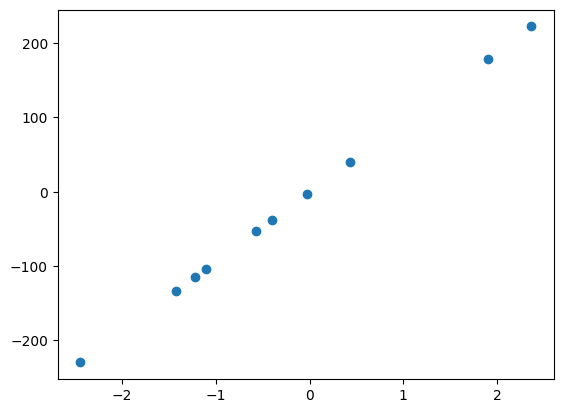

In [13]:
plt.scatter(x,y, marker='o')

You should see 10 blue dots roughly falling along a diagonal line.

We can move that line up or down the y-axis by changing the "bias" term when we call sklearn.datasets.make_regression, and then re-plotting the data:

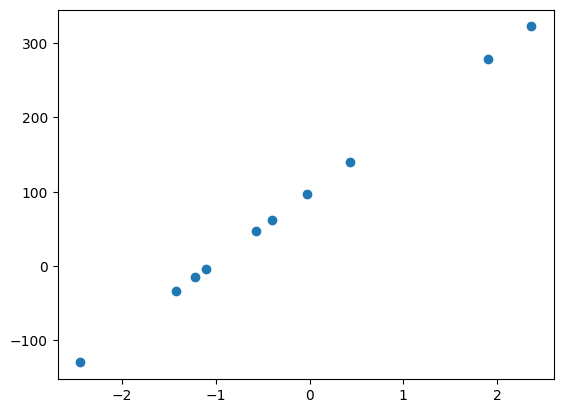

In [16]:
x,y = sklearn.datasets.make_regression(n_samples=10,
                                       n_features=1,
                                       bias=100.0,
                                       noise=0.1,
                                       random_state=221981)
plt.scatter(x,y, marker='o')

The 'line' remains the same, but if you look at the y-intercept (value of y when x=0), you'll see that it is now 100, instead of zero.

Remember that you can edit *any* text or code cell in this notebook! Feel free to take some time and 'play around' with the code cell above. You can change the "bias" option to different numbers, and see how it changes the simulated data.

Similarly, we can increase or decrease the 'error' or 'spread' of the data by changing the "noise" option

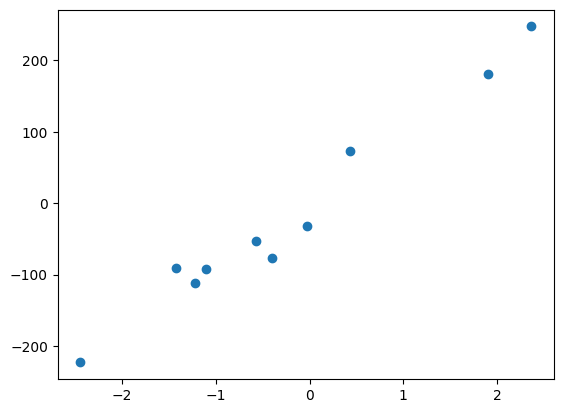

In [17]:
x,y = sklearn.datasets.make_regression(n_samples=10,
                                       n_features=1,
                                       bias=0.0,
                                       noise=20.0,
                                       random_state=221981)
plt.scatter(x,y, marker='o')

Now our x,y data are much more "noisy"!

It takes a bit more work to change the slope of the line, but we can do it by multiplying our simulated y values by a new slope

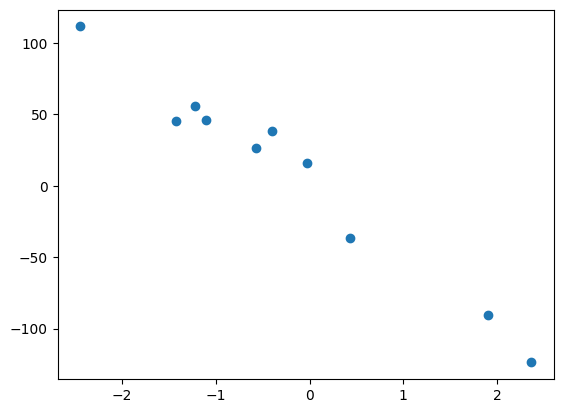

In [18]:
y = y * -0.5
plt.scatter(x,y, marker='o')

Unlike in the 'real world', simulating more data only requires us to alter the "n_samples" option

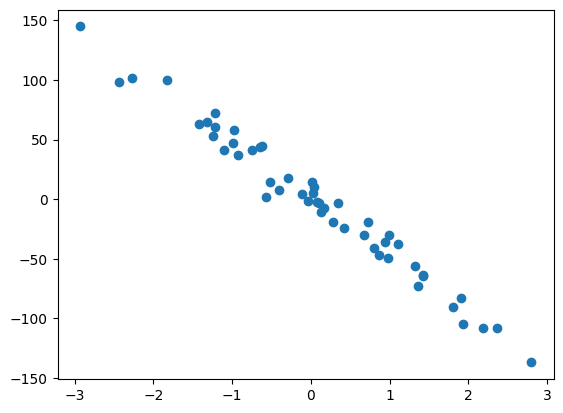

In [19]:
x,y = sklearn.datasets.make_regression(n_samples=50,
                                       n_features=1,
                                       bias=0.0,
                                       noise=20.0,
                                       random_state=221981)
y = y * -0.5
plt.scatter(x,y, marker='o')

## plot a 'linear model' of your data

So far, we have figured out how to simulate x,y pairs of 'training data'. Now let's build a linear model of our data.

Remember that a linear model is just

    y = m * x + b

We can write a python function that calculates y, given data x and user-specified values for model parameters, m and b. We'll set m=1 and b=0, by default.

In [20]:
def linear_model(x, m=1, b=0):
  return m*x + b

That's a pretty small amount of python code!

Here we define a function called "linear_model", by using the "def" keyword. The function takes 3 options, x, m and b. Default values are given for m and b. The function simply returns m*x + b, which is the equation for a line.

Don't forget to run this code cell, or your linear_model function will *not* be defined, and you will get an error!

Now let's try out our new function.

In [22]:
y = linear_model(10.5)
print(y)

10.5


Worked. But boring.

Let's try changing m and b.

In [23]:
y = linear_model(10.2, m=-1.2, b=.333)
print(y)

-11.906999999999998


That's great for a single value of x. Let's try it with some simulated x values!

In [24]:
# simulate linear x,y pairs
x,y = sklearn.datasets.make_regression(n_samples=10,
                                       n_features=1,
                                       bias=-100.0,
                                       noise=20.0,
                                       random_state=221981)
y = y * -0.5

# predict y_hat and print predictions
y_hat = linear_model(x)
print(y_hat)

[[-1.21843653]
 [-0.56905994]
 [-2.44462362]
 [-1.42286422]
 [-0.03138538]
 [-0.39880244]
 [ 0.42681153]
 [ 2.36287207]
 [ 1.90159245]
 [-1.10808664]]


In the preceding code cell, we re-simulate 10 x,y pairs of training data, and then we predict the y values using our linear_model function with default options of m=1 and b=0. We store our predicted y values in the python variable, "y_hat" (remember that!).

We can see the predicted y_hat values, but are they any good?

Let's define a plot_prediction function, so we can see how the predictions from our linear model 'stack up' against the 'true' simulated y values.

In [25]:
def plot_prediction(x, y_true, y_pred):
  plt.scatter(x, y_true, marker='o')
  plt.scatter(x, y_pred, marker='+')

Don't forget to run that code cell, so your "plot_prediction" function gets defined.

Then try it out:

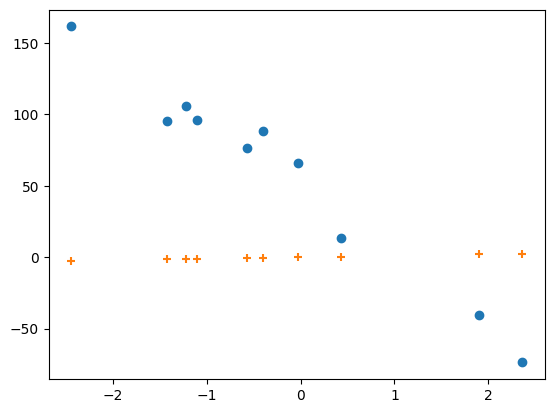

In [26]:
plot_prediction(x,y, y_hat)

hmm... Well, our orange "+" signs (predicted y values) *do* appear to be on a straight line! But, they *don't* appear to match the true y values (blue circles).

That's because our linear model has *not* been 'fit' to our training data!

Let's 'fit' our linear model to the existing x,y training data *manually*, by plugging in some different values for m and b, and *seeing* how close we can get the predicted y values to the true simulated y values.

Start with the code block below. Try running it, first. Then edit the code block to set new values for the m and b options to the "linear_model" function call, and re-run the code block.

Keep going until you can get the predicted y values (orange +) to match up with the true y values (blue circles).

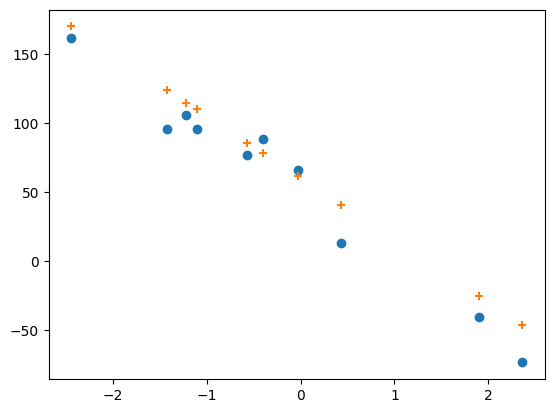

In [48]:
y_hat = linear_model(x, m=-45, b=60)
plot_prediction(x, y, y_hat)

Well, how 'close' were you able to get the predicted y values to the true values?

What slope and y-intercept gave you the 'best fit' linear model?

Were you able to get the predicted y-values to *exactly* match the true y-values? Why not?

## quantify your linear model's error

If you spent a little time trying different values for m and b in your linear model, you were probably able to get your predicted y values 'pretty close' to the true simulated y-values.

But *how good* is your model fit?

To quantify how well (or poorly) our model fits the training data, we need a "loss function".

In machine learning or AI, a "loss function" is any calculation that tells you how 'good' or 'bad' your model's predicted values are, compared to the true values. In most cases, a *higher* loss value is 'more bad', so we want our loss to be as small as possible. The smallest possible loss, given our model and training data, is termed the "optimal" loss; once your model achieves the 'optimal' loss, your model has been "optimized" or "fit" to the training data.

In machine learning and AI, there are *lots* of different possible loss functions, with different loss functions commonly used for different models or inference problems.

For linear regression modeling, the "mean squared error" loss is often used to optimize the model parameters, m and b.

Mathematically, mean squared error (or MSE) is

    MSE = 1/n  *  Σ(y-y_hat)**2

So, you take a predicted y value (y_hat), subtract it from the true y value (y), square that (so it's always positive!). Sum the "squared errors" over all y-y_hat pairs, and then take the average ("mean"). Hence, "mean squared error".

But whatever. Fortunately for us, the sklearn library has a convenient mean_squared_error function that calculates it for us!

First, we need to import the sklearn.metrics sub-module, which contains the "mean_squared_error" function.

In [49]:
import sklearn.metrics

Make sure you run this code cell, or you'll get a 'name not found' error later on, when you try to use the sklearn.metrics.mean_squared_error function.

The documentation for the sklearn.metrics.mean_squared_error function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). But for now, all we need to know is that this function takes two parameters: the true y values, and the predicted y values. It returns the 'error' between the predicted and true values.

Let's try it out.

147.34890567525684


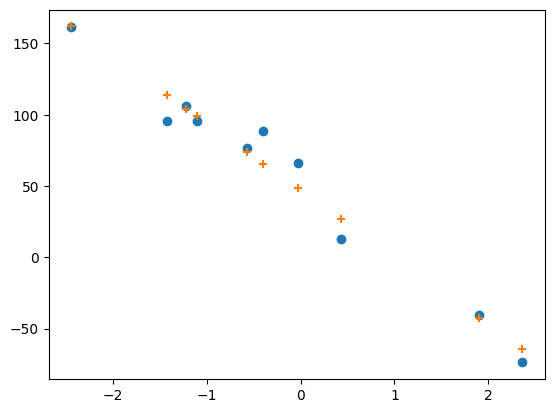

In [83]:
y_hat = linear_model(x, m=-47, b=47)
error = sklearn.metrics.mean_squared_error(y, y_hat)
print(error)

plot_prediction(x, y, y_hat)

I bet the error is pretty big!

Try 'playing around' with different values for m and b in the above code cell, and observe how the mean_squared_error changes as you try different values for m and b.

Can you use the error output to 'optimize' your model's 'fit' to the training data?

How small can you get the error?

If you want to 'see' the model fit as you go, insert the following line at the bottom of the code cell:

    plot_prediction(x, y, y_hat)

Congratulations, you just fit a linear model to training data by hand! You are now a "machine learner" :)

Conceptually, this is *exactly* how the *vast majority* of contemporary AI is done!

The important general bits to remember are:

* collect (or simulate) x,y training data
* build a model with 'trainable' parameters (m,b, in the case of a linear model)
* determine an appropriate loss function (MSE, in this case)
* 'fit' the model's parameter values to the training data by minimizing the loss

Once you have fit your model to your training data, you can use the model with fitted parameter values to 'predict' new response values (y), given new values for the explanatory variable (x).